# Bounded Distance Decoding Performance of a Linear Block Code

This code is provided as supplementary material of the lecture Channel Coding 2 - Advanced Methods.

This code illustrates
* The decoding performance of codes under BDD decoding
* Comparison with the Bhattacharyya-parameter based bound on ML decoding

In [4]:
import numpy as np
import numpy.polynomial.polynomial as npp
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt

Implement the helper function which computes the probability $P_\ell^w$ that a received word $\boldsymbol{y}$ is exactly at Hamming distance $\ell$ from a codeword of weight $w$ after transmission of the zero codeword over a BSC with error probability $\delta$, with
$$
P_{\ell}^w = \sum_{r=0}^{\ell}\binom{w}{\ell-r}\binom{n-w}{r}\delta^{w-\ell+2r}(1-\delta)^{n-w+l-2r}
$$

In [22]:
def Plw(n,l,w,delta):
    return np.sum([comb(w,l-r)*comb(n-w,r)*(delta**(w-l+2*r))*((1-delta)**(n-w+l-2*r)) for r in range(l+1)])

Show performance and some bounds illustrating the decoding performance over the BSC of a binary linear block code with generator matrix
$$
\boldsymbol{G} = \left(\begin{array}{cccccccccc}
1 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 & 1 \\ 
0 & 1 & 0 & 0 & 0 & 1 & 1 & 0 & 1 & 1 \\ 
0 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 0 & 1 \\ 
0 & 0 & 0 & 1 & 0 & 1 & 1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1
\end{array} \right)
$$
that has weight enumerator polynomial $A(W) = 4W^3+6W^4+8W^5+8W^6+4W^7+W^8$.

We compute the following:
1. The performance of bounded distance decoding (BDD) given by
$$
P_{cw} = \sum_{w=1}^{n}A_w \sum_{\ell=0}^{\lfloor\frac{d_{\min}-1}{2}\rfloor}P_{\ell}^w
$$
2. An easier to compute upper bound on the performance of BDD, which is given by
$$
P_{cw} \leq \sum_{w=\lfloor\frac{d_{\min}-1}{2}\rfloor+1}^{n}\binom{n}{w}\delta^{w}(1-\delta)^{n-w}
$$
3. The failure probability of BDD (i.e., the probability that the decoder cannot find a valid codeword, which is the probability that we fall outside a sphere of radius $\lfloor\frac{d_{\min}-1}{2}\rfloor$ around the codewords)
$$
P_F = 1 - \underbrace{\sum_{j=0}^{\lfloor\frac{d_{\min}-1}{2}\rfloor}\binom{n}{j}\delta^j(1-\delta)^{n-j}}_{\text{prob. of falling into correct sphere}} - \underbrace{P_{cw}}_{\substack{\text{prob. of}\\ \text{failing into}\\\text{incorrect sphere}}}
$$
4. An upper bound on ML decoding given by
$$
P_{\mathrm{ML}} \leq A(\mathcal{B}(\mathbb{C}_{\text{BSC}})) = \sum_{w=d_{\min}}^n 2A_w\sqrt{\delta(1-\delta)}
$$
where $\mathcal{B}(\mathbb{C}_{\text{BSC}} = 2\sqrt{\delta(1-\delta)}$ is the Bhattacharyya parameter of the BSC. We can see that the ML bound is rather loose in this case as we can easily outperform the bound with BDD.

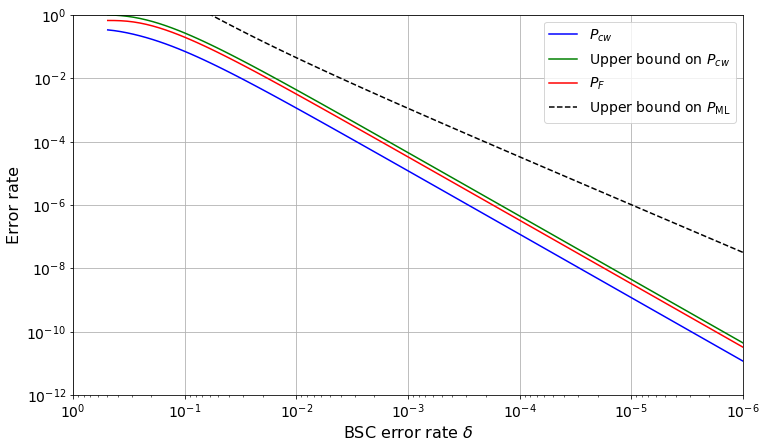

In [51]:
# weight enumerator polynomial
Aw = [0,0,0,4,6,8,8,4,1]

n = 10

dmin = np.nonzero(Aw)[0][0]

e = int(np.floor((dmin-1)/2))

delta_range = np.logspace(-6,-0.31,100)
Pcw_range = [np.sum([Aw[w]*np.sum([Plw(n,l,w,delta) for l in range(e+1)]) for w in range(len(Aw))]) for delta in delta_range]
Pcw_bound_range = [np.sum([comb(n,w)*((delta)**w)*((1-delta)**(n-w)) for w in range(e+1,n+1)]) for delta in delta_range]

P_F_range = np.array([1-np.sum([comb(n,w)*((delta)**w)*((1-delta)**(n-w)) for w in range(e+1)]) for delta in delta_range]) - np.array(Pcw_range)



# compute bound for ML decoding
Bhattacharyya_range = [2*np.sqrt(delta*(1-delta)) for delta in delta_range]
P_ML_bound_range = [npp.polyval(B, Aw) for B in Bhattacharyya_range]


fig = plt.figure(1,figsize=(12,7))
plt.loglog(delta_range, Pcw_range,'b-')
plt.loglog(delta_range, Pcw_bound_range,'g-')
plt.loglog(delta_range, P_F_range,'r-')
plt.loglog(delta_range, P_ML_bound_range,'k--')

plt.xlim((1,1e-6))
plt.ylim((1e-12,1))
plt.xlabel('BSC error rate $\delta$', fontsize=16)
plt.ylabel('Error rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(['$P_{cw}$','Upper bound on $P_{cw}$', '$P_F$', 'Upper bound on $P_{\mathrm{ML}}$'], fontsize=14);